# Install

In [1]:
# pip install opencv-python

# Imports

In [2]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Hough Line Transform

## Load Image

In [3]:
image_number = 0

In [4]:
# load image as gray scale
img = cv2.imread(f"./pre_snap_images/{image_number}.png")

## Convert to Grayscale

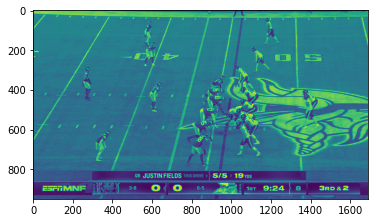

In [5]:
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

## Masking Score Bar

In [6]:
mask_height = 0.81

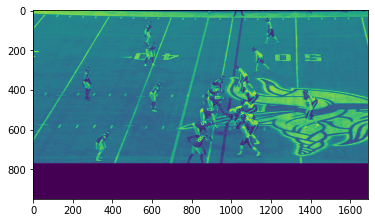

In [7]:
# masking score bar
mask_height = int(gray.shape[0] * mask_height)
mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.rectangle(mask, (0, 0), (gray.shape[1], mask_height), (255), thickness=-1)

# Apply the mask to the grayscale image
masked_gray = cv2.bitwise_and(gray, mask)
plt.imshow(masked_gray)

## Edge Detection

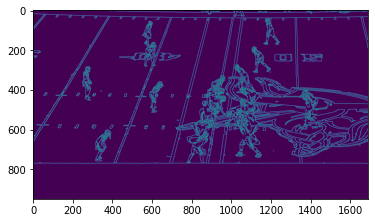

In [8]:
# edge detection
dst = cv2.Canny(masked_gray, 50, 200, None, 3)
plt.imshow(dst)

## Probabilistic

In [9]:
# Copy edges to the images that will display the results in BGR
cdstP = None
cdstP = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

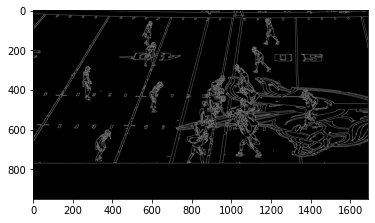

In [10]:
plt.imshow(cdstP)

In [11]:
# probabilistic hough transform
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 90, 6)

# Specify a range of angles to consider as horizontal
angle_threshold_low = 85  # lower angle in degrees
angle_threshold_high = 95  # higher angle in degrees

if linesP is not None:
    print(f"Lines detect: {len(linesP)}")
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        
        # calculate the angle of the line
        line_angle = abs(np.arctan2(l[3] - l[1], l[2] - l[0]) * (180 / np.pi))

        # vertical field line angles
        vert_condition = line_angle >= 50 and line_angle <= 100
        
        # horizontal field line angles
        horiz_condition = line_angle <= 3
        
        # filter out lines that are noise
        if vert_condition or horiz_condition:
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

Lines detect: 56


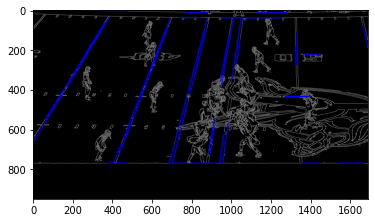

In [12]:
plt.imshow(cdstP)

## Extracting Field Lines

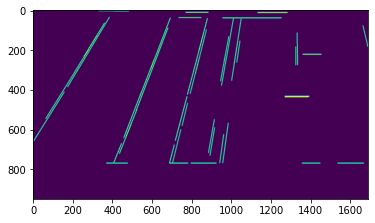

In [13]:
mask = cv2.inRange(cdstP, (0, 0, 255), (0, 0, 255))
plt.imshow(mask)

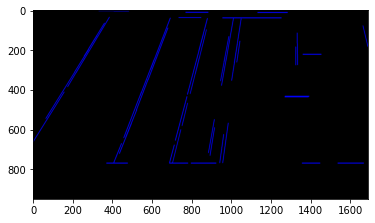

In [14]:
# Bitwise-AND mask and original image to extract desired color
extracted_image = cv2.bitwise_and(cdstP, cdstP, mask=mask)
plt.imshow(extracted_image)

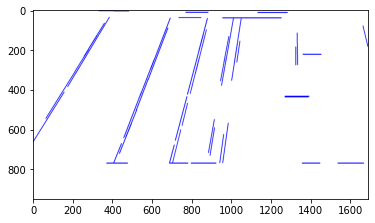

In [15]:
# First, invert the mask: where the mask is black, we make it white, and vice versa
inverse_mask = cv2.bitwise_not(mask)

# Now create a white image of the same size as the extracted_image
white_background = np.ones_like(extracted_image) * 255

# Use the inverse mask to change the black background of the extracted_image to white
extracted_image[inverse_mask == 255] = white_background[inverse_mask == 255]

# Now extracted_image should have white background with the colored lines
# Display the image with the white background
plt.imshow(extracted_image)  # Convert BGR to RGB for displaying in matplotlib

# Saving Sample

In [16]:
# cv2.imwrite(f"./detection_samples/{image_number}-cdstP.jpg", cdstP)
# cv2.imwrite(f"./detection_samples/{image_number}-extracted.jpg", extracted_image)
# cv2.imwrite(f"./detection_samples/{image_number}-original.jpg", cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [17]:
# plt.imshow(cdstP)

In [18]:
# plt.imshow(extracted_image)

In [19]:
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))